<a href="https://colab.research.google.com/github/javier-jaime/Tool-Crib/blob/master/Colab%5CWord_Count_with_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [1]:
!pip install wordcloud
!pip install pysrt
import pysrt

from google.colab import drive
from google.colab import files

import collections

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 104 kB 5.4 MB/s 
  Created wheel for pysrt: filename=pysrt-1.1.2-py3-none-any.whl size=13444 sha256=a6fbaa045d48c213315bbc761e2ce7d2835b735d836c38453ea6e457c6a5a8a5
  Stored in directory: /root/.cache/pip/wheels/b2/f8/e8/a26be4111ab5ec931e845777e574d1483b4adddc50d3e591a6
Successfully built pysrt


Read the Data from a srt file extracted from youtube

In [2]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
# open file from google drive with pysrt
subs = pysrt.open('drive/MyDrive/Colab Notebooks/Datasets/LWOL June 8, 2022 Freeman.srt')

# Print Text in file
# for sub in subs:
#    print(sub.text)

In [16]:
# if you want to use you own stopwords, read file from Google Drive
stopwords = set(line.strip() for line in open('drive/MyDrive/Colab Notebooks/Datasets/stopwords'))

# create your data structure here.
wordcount={}

# Instantiate a dictionary, and for every word in the file, add to 
# the dictionary if it doesn't exist. If it does, increase the count.

# Hint: To eliminate duplicates, remember to split by punctuation, 
# and use case demiliters. The functions lower() and split() will be useful!

for word in subs.text.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace("\"","")
    word = word.replace("“","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

# after building your wordcount, you can then sort it and return the first
# n words.  If you want, collections.Counter may be useful.

d = collections.Counter(wordcount)

#print(d.most_common(50))
for word, count in d.most_common(50):
	print(word, ": ", count)

know :  90
right :  85
um :  76
really :  42
people :  40
uh :  33
yeah :  28
things :  28
lot :  28
well :  27
need :  25
thing :  24
want :  23
going :  22
important :  20
go :  19
user :  19
okay :  19
business :  18
kind :  18
think :  17
stuff :  16
much :  15
one :  15
customers :  15
something :  14
definitely :  14
question :  14
see :  13
great :  13
bit :  13
little :  12
find :  12
way :  12
understanding :  11
now :  11
trust :  11
different :  11
ux :  10
questions :  10
customer :  10
understand :  10
good :  10
got :  10
time :  9
product :  9
use :  9
approach :  9
needs :  9
even :  9


Create a Word Cloud

In [17]:
# Uncomment to read directly from a txt file
# subs_text = open('LWOL-March-30.txt', 'r').read() 

In [18]:
# Import stopwords from wordcloud or comment to use your own
stopwords = set(STOPWORDS)

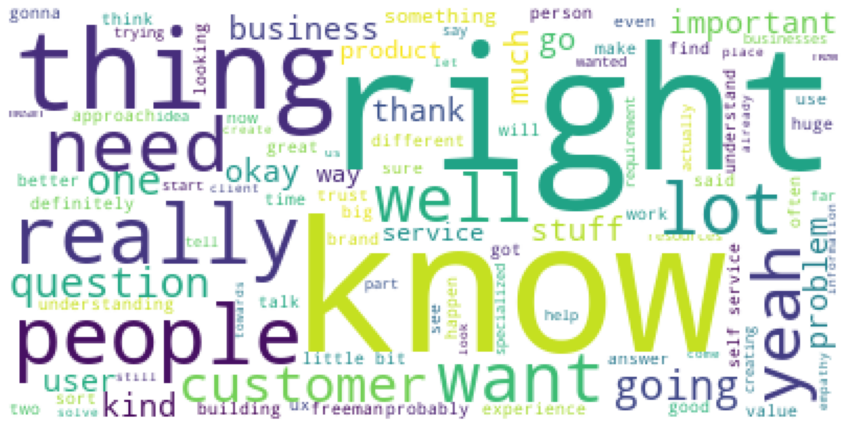

In [21]:
# instantiate a word cloud object
wc = WordCloud(
    background_color='white',
    max_words=100,
    stopwords=stopwords
)

# add new words to stopwords
stopwords.add('um')
stopwords.add('uh')

# generate the word cloud
wc.generate(subs.text)

fig = plt.figure()
fig.set_figwidth(15) # set width
fig.set_figheight(20) # set height

# display the word cloud
plt.imshow(wc)
plt.axis('off')
plt.show()